# GitHub API usage example

In [1]:
import pandas as pd
%load_ext restmagic

Some calls require personal API token: https://blog.github.com/2013-05-16-personal-api-tokens/

In [10]:
token = ''

In [3]:
%%rest_root https://api.github.com
Accept: application/vnd.github.v3+json
Authorization: Token $token

Requests defaults are set.


## Get top 10 forked projects from the GitHub, for the "ipython" query

In [4]:
r = %rest -q search/repositories?q=ipython&sort=forks&per_page=10
df = pd.DataFrame(r.json()['items'], columns=('full_name', 'forks_count', 'watchers'))
df.set_index('full_name', inplace=True)
df

,forks_count,watchers
full_name,,
wesm/pydata-book,6052,6585
donnemartin/data-science-ipython-notebooks,4047,13738
ipython/ipython,3643,13004
jrjohansson/scientific-python-lectures,1319,2256
jdwittenauer/ipython-notebooks,1086,1935
jupyterhub/jupyterhub,827,3631
PipelineAI/pipeline,775,2950
powerline/powerline,741,9322
ogrisel/parallel_ml_tutorial,571,1444


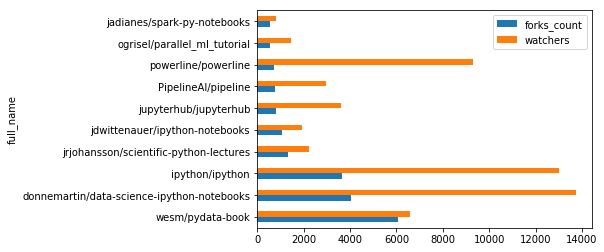

In [9]:
df.plot(kind='barh')

## Follow Github User
Personal API token is required to perform the call: https://blog.github.com/2013-05-16-personal-api-tokens/

In [6]:
%rest PUT user/following/gvanrossum

<Response [204]>

### Unfollow GitHub user

In [7]:
%rest -q DELETE user/following/gvanrossum

<Response [204]>

## Search GitHub for "pritn" string in Python code

In [8]:
r = %rest -q search/code?q=pritn+in:file+language:python
data = r.json()
urls = [i['html_url'] for i in data['items']]
print('\n'.join(urls))
print("== {0} of total {1} ==".format(len(urls), data['total_count']))

https://github.com/Ramieltje/octotelegram/blob/a5a15408ce586c6defdcbd54a6fae7195deb38dd/CS1301%20exercises/Hello%20world.py
https://github.com/abdallah-ali-abdallah/Simply-Raspberry-Pi-Book/blob/6f273337b76ba8083abf74cd9652ad187896392c/Attachments/1-%20Python%20Examples%20(Source%20Codes)/4-1%20Motion%20Detector.py
https://github.com/runei/IA/blob/77fa1e103162e67b7823ca1ea4dbed396afb3a88/trabDCG.py
https://github.com/infixsrf/Trash/blob/4d0493cdad38e48f3f63a9ef95877fa52df7bd4c/programmer.py
https://github.com/lxxcumt/learnpython/blob/b63b01b31c283962576cd0dc2d55ee97e9f48d13/ex25.py
https://github.com/CHTramp/Git-/blob/90e8339a52a571c88d2b6e68e9475593c846517f/Python%E8%AF%BE%E7%A8%8B%E4%BB%A3%E7%A0%81/%E8%AF%BE%E7%A8%8B%E5%AD%A6%E4%B9%A0%E4%BB%A3%E7%A0%81/day6-%E5%87%BD%E6%95%B0%E6%93%8D%E4%BD%9C/%E5%87%BD%E6%95%B0%E7%AC%AC%E4%BA%8C%E9%83%A8%E5%88%86%E7%9A%84homework.py
https://github.com/deepnighttwo/deepnighttwo/blob/baeee505d1d48a92adaff874552c0db08f32e6bb/myutilities/workpy/parseasi